# 1-Regression-Yiyecek Teslimat Süresi Tahmini

Yemek Teslimatı hizmetlerinin, müşterileriyle şeffaflığı korumak için siparişinizin teslim edilmesi için gereken süreyi doğru göstermesi gerekir. Bu şirketler, teslimat ortaklarının geçmişte aynı mesafeyi ne kadar sürede kat ettiğine bağlı olarak yemek teslimat süresini tahmin etmek için Makine Öğrenimi algoritmalarını kullanıyor.

<img src= "food-delivery.jpg">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

## Veri Okuma ve Analizi

In [4]:
df=pd.read_csv("deliverytime.txt")

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [6]:
df.shape

(45593, 11)

In [7]:
# İngilizce sütun isimlerini Türkçe'ye çevirecek bir sözlük oluşturuyoruz
dic = {
    'ID': 'Kimlik',
    'Delivery_person_ID': 'Teslimat_personel_ID',
    'Delivery_person_Age': 'Teslimat_personel_yası',
    'Delivery_person_Ratings': 'Teslimat_personel_puanları',
    'Restaurant_latitude': 'Restoran_enlemi',
    'Restaurant_longitude': 'Restoran_boylamı',
    'Delivery_location_latitude': 'Teslimat_enlemi',
    'Delivery_location_longitude': 'Teslimat_boylamı',
    'Type_of_order': 'Sipariş_türü',
    'Type_of_vehicle': 'Araç_türü',
    'Time_taken(min)': 'Teslimat_süresi(dakika)'
}

# Veri çerçevenizin sütun isimlerini çevirin
df.rename(columns=dic, inplace=True)

In [8]:
df.sample(7)

,Kimlik,Teslimat_personel_ID,Teslimat_personel_yası,Teslimat_personel_puanları,Restoran_enlemi,Restoran_boylamı,Teslimat_enlemi,Teslimat_boylamı,Sipariş_türü,Araç_türü,Teslimat_süresi(dakika)
21307,59C8,CHENRES03DEL03,39,4.8,13.091809,80.219104,13.181809,80.309104,Drinks,scooter,27
19803,467C,HYDRES12DEL01,31,4.9,17.429585,78.392621,17.469585,78.432621,Buffet,motorcycle,40
24996,E1E7,KOCRES01DEL01,20,4.0,9.979363,76.285001,10.049363,76.355001,Drinks,motorcycle,33
43593,1690,MUMRES09DEL03,39,4.7,18.994049,72.825203,19.084049,72.915203,Snack,motorcycle,27
40457,49EA,VADRES05DEL01,27,4.7,22.310526,73.170937,22.380526,73.240937,Snack,scooter,26
12223,2E+08,BANGRES03DEL01,28,4.7,12.979166,77.640709,13.019166,77.680709,Snack,motorcycle,30
25846,866E,JAPRES17DEL01,25,4.5,26.892312,75.806896,26.932312,75.846896,Drinks,scooter,10


In [9]:
df.describe()

,Teslimat_personel_yası,Teslimat_personel_puanları,Restoran_enlemi,Restoran_boylamı,Teslimat_enlemi,Teslimat_boylamı,Teslimat_süresi(dakika)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [10]:
df.corr()

,Teslimat_personel_yası,Teslimat_personel_puanları,Restoran_enlemi,Restoran_boylamı,Teslimat_enlemi,Teslimat_boylamı,Teslimat_süresi(dakika)
Teslimat_personel_yası,1.000000,-0.067449,-0.001955,-0.006796,0.002359,-0.000593,0.292708
Teslimat_personel_puanları,-0.067449,1.000000,-0.004846,-0.011147,-0.010198,-0.013350,-0.331103
Restoran_enlemi,-0.001955,-0.004846,1.000000,0.661784,0.866378,0.602713,0.013981
Restoran_boylamı,-0.006796,-0.011147,0.661784,1.000000,0.632293,0.915026,0.007821
Teslimat_enlemi,0.002359,-0.010198,0.866378,0.632293,1.000000,0.690515,0.014243
Teslimat_boylamı,-0.000593,-0.013350,0.602713,0.915026,0.690515,1.000000,0.007625
Teslimat_süresi(dakika),0.292708,-0.331103,0.013981,0.007821,0.014243,0.007625,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kimlik                      45593 non-null  object 
 1   Teslimat_personel_ID        45593 non-null  object 
 2   Teslimat_personel_yası      45593 non-null  int64  
 3   Teslimat_personel_puanları  45593 non-null  float64
 4   Restoran_enlemi             45593 non-null  float64
 5   Restoran_boylamı            45593 non-null  float64
 6   Teslimat_enlemi             45593 non-null  float64
 7   Teslimat_boylamı            45593 non-null  float64
 8   Sipariş_türü                45593 non-null  object 
 9   Araç_türü                   45593 non-null  object 
 10  Teslimat_süresi(dakika)     45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [38]:
silinebilir=['Kimlik',  'Teslimat_personel_ID']
df.drop(silinebilir, inplace=True, axis=1)

## Data Visualization

<Axes: >

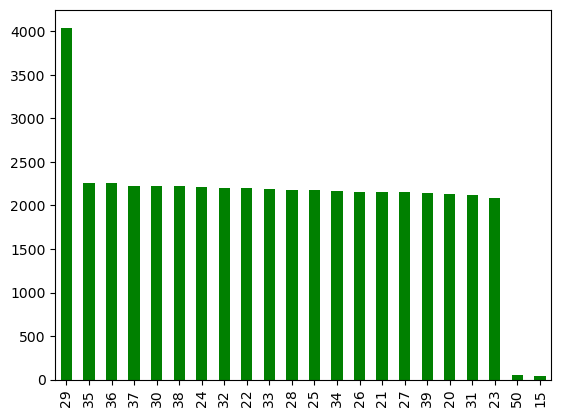

In [28]:
df["Teslimat_personel_yası"].value_counts().plot.bar(color="green")

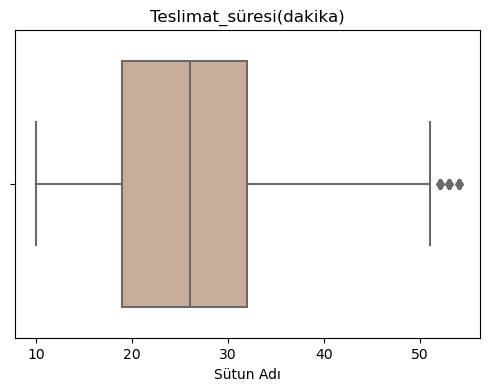

In [26]:
# Box plot çizimi
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Teslimat_süresi(dakika)'], palette='pink')  # Box plot rengi olarak pembe
plt.xlabel('Sütun Adı')  # Sütun adını buraya ekleyin
plt.title('Teslimat_süresi(dakika)')
plt.show()

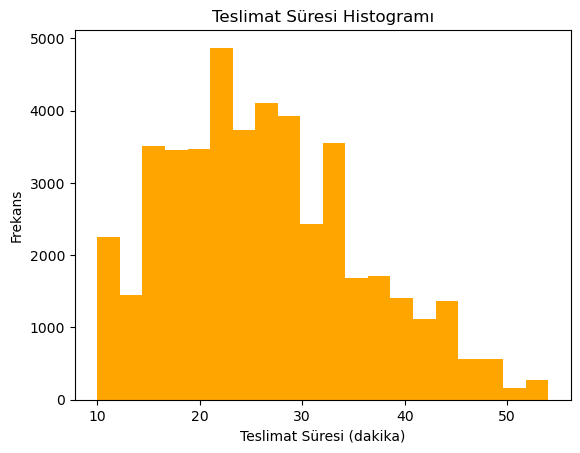

In [24]:
plt.hist(df['Teslimat_süresi(dakika)'], bins=20, color="orange")
plt.xlabel('Teslimat Süresi (dakika)')
plt.ylabel('Frekans')
plt.title('Teslimat Süresi Histogramı')
plt.show()

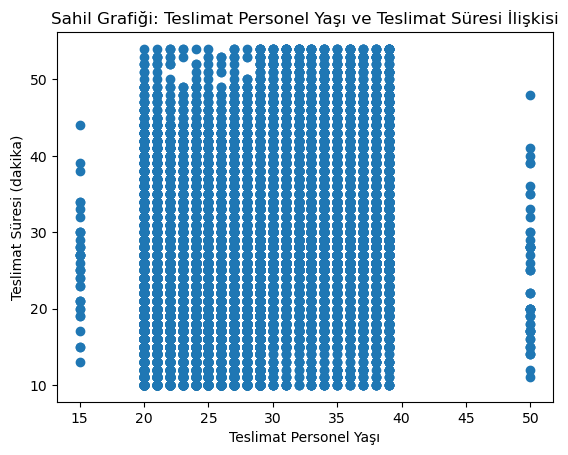

In [20]:
plt.scatter(df['Teslimat_personel_yası'], df['Teslimat_süresi(dakika)'])
plt.xlabel('Teslimat Personel Yaşı')
plt.ylabel('Teslimat Süresi (dakika)')
plt.title('Sahil Grafiği: Teslimat Personel Yaşı ve Teslimat Süresi İlişkisi')
plt.show()

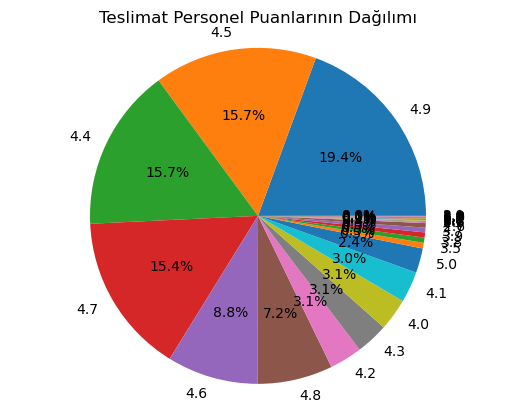

In [23]:
plt.pie(x=df['Teslimat_personel_puanları'].value_counts(), labels=df["Teslimat_personel_puanları"].unique(), autopct='%1.1f%%')
plt.axis('equal')  # Dairesel bir pasta grafiği oluşturmak için bu satırı ekleyin
plt.title('Teslimat Personel Puanlarının Dağılımı')
plt.show()

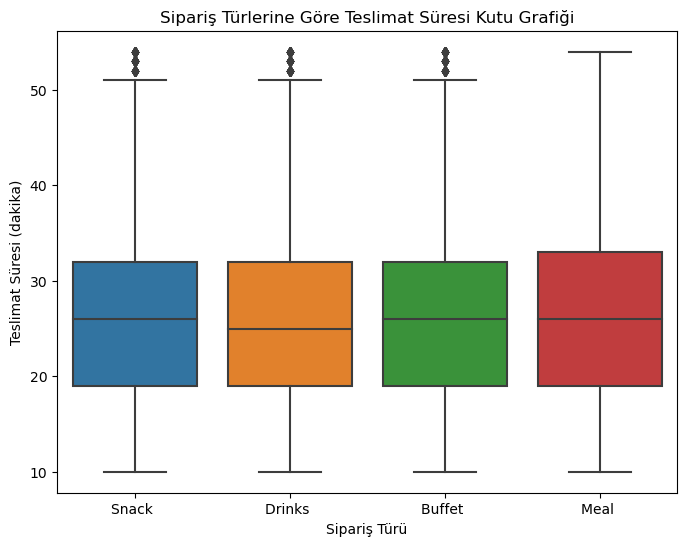

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sipariş_türü', y='Teslimat_süresi(dakika)', data=df)
plt.xlabel('Sipariş Türü')
plt.ylabel('Teslimat Süresi (dakika)')
plt.title('Sipariş Türlerine Göre Teslimat Süresi Kutu Grafiği')
plt.show()

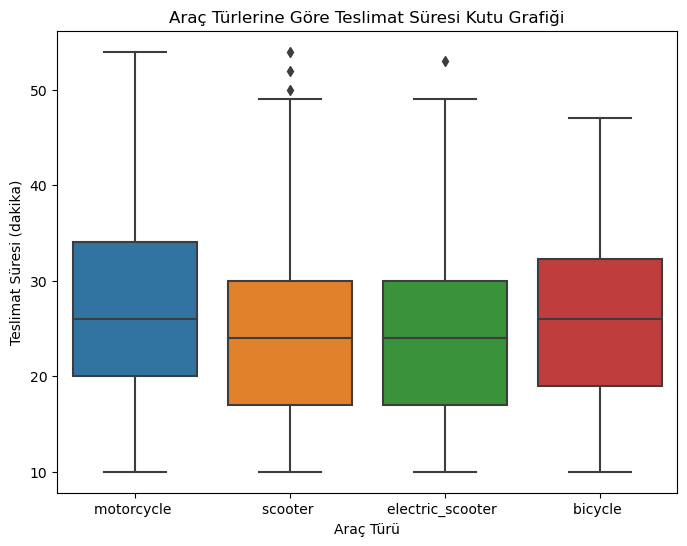

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Araç_türü', y='Teslimat_süresi(dakika)', data=df)
plt.xlabel('Araç Türü')
plt.ylabel('Teslimat Süresi (dakika)')
plt.title('Araç Türlerine Göre Teslimat Süresi Kutu Grafiği')
plt.show()

## Feature Engineering

Tahmin oranını yükseltmek için öncelikle verilerinizi dikkatle analiz etmelisiniz. Verilerinizin doğru ve uygun şekilde işlenmesi, modelinizin daha iyi tahminler yapmasına yardımcı olabilir. İşte bu veri seti üzerinde tahmin oranını artırmak için yapabileceğiniz bazı önemli adımlar:

1. **Veri Keşfi (Data Exploration):** Veri setinizi daha yakından inceleyin. Bu, verilerin dağılımını, aykırı değerleri ve eksik verileri anlamanıza yardımcı olur. Özellikle "Teslimat_süresi(dakika)" sütunu, tahmin etmeye çalıştığınız hedef değişken olabilir.

2. **Aykırı Değer İşleme (Outlier Handling):** Aykırı değerler, modelinizi olumsuz etkileyebilir. Aykırı değerleri tanımlayın ve işlemek için uygun bir strateji uygulayın. Aykırı değerlerin nasıl işleneceği, verileriniz ve modelinizin gereksinimlerine bağlı olacaktır.

3. **Özellik Mühendisliği (Feature Engineering):** Mevcut özellikleri iyileştirebilir veya yeni özellikler oluşturabilirsiniz. Özellikle coğrafi verileri işlerken, mesafe hesaplamaları gibi yeni özellikler oluşturmak faydalı olabilir.

4. **Kategorik Değişkenlerin İşlenmesi:** "Sipariş_türü" ve "Araç_türü" gibi kategorik değişkenleri modelinizin anlayabileceği sayısal biçimlere dönüştürmelisiniz. Bu, one-hot encoding veya label encoding gibi yöntemlerle yapılabilir.

5. **Veri Ölçekleme veya Normalleştirme:** Verilerinizi Min-Max ölçeklemesi veya Z-skor ölçeklemesi gibi tekniklerle ölçeklendirebilirsiniz. Bu, farklı özelliklerin aynı ölçekte olmasına yardımcı olur.

6. **Model Seçimi:** Hangi modelin kullanılacağını dikkatlice seçin. Regresyon problemi için lineer regresyon, karar ağaçları, rastgele ormanlar, destek vektör regresyonu ve daha karmaşık modeller gibi çeşitli seçenekler vardır. Veri setinizin özelliklerine ve büyüklüğüne bağlı olarak en uygun modeli seçin.

7. **Hiperparametre Ayarı:** Seçtiğiniz modelin hiperparametrelerini çapraz doğrulama (cross-validation) kullanarak ayarlayın. Bu, modelinizin performansını iyileştirebilir.

8. **Çapraz Doğrulama Kullanma:** Modelinizi değerlendirmek ve aşırı uyumu önlemek için çapraz doğrulama yöntemlerini kullanın.

9. **Düzenleme (Regularization):** Düzenleme teknikleri (örneğin, Ridge veya Lasso regresyonu) kullanarak modelinizin aşırı uyumu önleyin.

10. **Hata Analizi:** Modelinizin tahminlerini dikkatle inceleyin ve hangi durumlarda hata yaptığını anlamaya çalışın. Bu, modelinizi daha da geliştirmenize yardımcı olabilir.

11. **Domain Bilgisi Kullanma:** Problem alanınıza ait bilgi ve içgörüler, özellikle özellik mühendisliği aşamasında, daha iyi özelliklerin oluşturulmasına yardımcı olabilir.

Tahmin oranını artırmak, veri bilimi sürecinin her aşamasında dikkatlice çalışmayı gerektirir. Başarı oranını artırmak için veri setinizi ve modelinizi iyileştirmeye yönelik bu adımları takip ederek daha iyi sonuçlar elde edebilirsiniz.

In [36]:
from geopy.distance import great_circle
import pandas as pd

# Mesafe hesaplamalarını yapmak için bir fonksiyon tanımlama
def mesafe_hesapla(row):
    restoran_konumu = (row['Restoran_enlemi'], row['Restoran_boylamı'])
    teslimat_konumu = (row['Teslimat_enlemi'], row['Teslimat_boylamı'])
    return great_circle(restoran_konumu, teslimat_konumu).kilometers

# Yeni bir özellik (mesafe) oluşturma ve veri çerçevesine eklemek
df['Mesafe_km'] = df.apply(mesafe_hesapla, axis=1)

# Sonuçları gösterme
print(df.head())

  Kimlik Teslimat_personel_ID  Teslimat_personel_yası  \
0   4607       INDORES13DEL02                      37   
1   B379       BANGRES18DEL02                      34   
2   5D6D       BANGRES19DEL01                      23   
3   7A6A      COIMBRES13DEL02                      38   
4   70A2       CHENRES12DEL01                      32   

   Teslimat_personel_puanları  Restoran_enlemi  Restoran_boylamı  \
0                         4.9        22.745049         75.892471   
1                         4.5        12.913041         77.683237   
2                         4.4        12.914264         77.678400   
3                         4.7        11.003669         76.976494   
4                         4.6        12.972793         80.249982   

   Teslimat_enlemi  Teslimat_boylamı Sipariş_türü    Araç_türü  \
0        22.765049         75.912471       Snack   motorcycle    
1        13.043041         77.813237       Snack      scooter    
2        12.924264         77.688400      Drinks  

Bu kodun amacı, restoran konumu ile teslimat konumu arasındaki mesafeyi kilometre cinsinden hesaplayarak, bu mesafeyi veri çerçevesine eklemektir. Bu mesafe, belirli bir siparişin teslimat süresini etkileyebilir ve analizlerde kullanışlı bir özellik olabilir.
Teslimat Süresi Tahmini: Teslimat süresini tahmin etmek için, siparişin alındığı restoran ile teslimat adresi arasındaki mesafe önemli bir faktördür. Bu mesafeyi hesaplayarak, teslimat süresini daha doğru bir şekilde tahmin edebilirsiniz.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Teslimat_personel_yası      45593 non-null  int64  
 1   Teslimat_personel_puanları  45593 non-null  float64
 2   Restoran_enlemi             45593 non-null  float64
 3   Restoran_boylamı            45593 non-null  float64
 4   Teslimat_enlemi             45593 non-null  float64
 5   Teslimat_boylamı            45593 non-null  float64
 6   Sipariş_türü                45593 non-null  object 
 7   Araç_türü                   45593 non-null  object 
 8   Teslimat_süresi(dakika)     45593 non-null  int64  
 9   Mesafe_km                   45593 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.5+ MB


In [41]:
# İki tane object verimizi algoritma güzel işlesin için sayısal verilere dönüştürelim
df["Sipariş_türü"].value_counts()

Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Sipariş_türü, dtype: int64

In [42]:
df["Araç_türü"].value_counts()

motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Araç_türü, dtype: int64

**One-Hot Encoding:**(getdummies)
Bu yöntemde, her kategori bir sütun oluşturularak ve her sütun 0 veya 1 ile kodlanır. Her bir sütun, ilgili kategorinin mevcut olup olmadığını belirtir.
Bu kod, "Sipariş_türü" ve "Araç_türü" sütunlarını one-hot encoding ile dönüştürür ve her bir kategoriye karşılık gelen yeni sütunlar oluşturur. Her bir sütun, ilgili kategorinin mevcut olup olmadığını belirtir ve 0 veya 1 değerlerini alır.

In [45]:
# "Sipariş_türü" ve "Araç_türü" sütunlarını one-hot encoding ile dönüştürme
df1 = pd.get_dummies(df, columns=['Sipariş_türü', 'Araç_türü'], prefix=['Sipariş_türü', 'Araç_türü'])

df1.head()

,Teslimat_personel_yası,Teslimat_personel_puanları,Restoran_enlemi,Restoran_boylamı,Teslimat_enlemi,Teslimat_boylamı,Teslimat_süresi(dakika),Mesafe_km,Sipariş_türü_Buffet,Sipariş_türü_Drinks,Sipariş_türü_Meal,Sipariş_türü_Snack,Araç_türü_bicycle,Araç_türü_electric_scooter,Araç_türü_motorcycle,Araç_türü_scooter
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,3.025154,0,0,0,1,0,0,1,0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,20.183558,0,0,0,1,0,0,0,1
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,1.552760,0,1,0,0,0,0,1,0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,7.790412,1,0,0,0,0,0,1,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,6.210147,0,0,0,1,0,0,0,1


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Teslimat_personel_yası       45593 non-null  int64  
 1   Teslimat_personel_puanları   45593 non-null  float64
 2   Restoran_enlemi              45593 non-null  float64
 3   Restoran_boylamı             45593 non-null  float64
 4   Teslimat_enlemi              45593 non-null  float64
 5   Teslimat_boylamı             45593 non-null  float64
 6   Teslimat_süresi(dakika)      45593 non-null  int64  
 7   Mesafe_km                    45593 non-null  float64
 8   Sipariş_türü_Buffet          45593 non-null  uint8  
 9   Sipariş_türü_Drinks          45593 non-null  uint8  
 10  Sipariş_türü_Meal            45593 non-null  uint8  
 11  Sipariş_türü_Snack           45593 non-null  uint8  
 12  Araç_türü_bicycle            45593 non-null  uint8  
 13  Araç_türü_electr

In [58]:
# Özel bir işlev kullanarak ondalık kısmı kesmeden float değerleri int türüne dönüştürme
def float_to_int_with_precision(value, precision=2):
    return int(value * 10**precision)

# Belirli sütunları özel işlevi kullanarak dönüştürme
precision = 2  # İstediğiniz hassasiyet seviyesini ayarlayın (örneğin, 2 ondalık basamak)
df1['Teslimat_personel_puanları'] = df1['Teslimat_personel_puanları'].apply(float_to_int_with_precision, precision=precision)
df1['Restoran_enlemi'] = df1['Restoran_enlemi'].apply(float_to_int_with_precision, precision=precision)
df1['Restoran_boylamı'] = df1['Restoran_boylamı'].apply(float_to_int_with_precision, precision=precision)
df1['Teslimat_enlemi'] = df1['Teslimat_enlemi'].apply(float_to_int_with_precision, precision=precision)
df1['Teslimat_boylamı'] = df1['Teslimat_boylamı'].apply(float_to_int_with_precision, precision=precision)
df1['Mesafe_km'] = df1['Mesafe_km'].apply(float_to_int_with_precision, precision=precision)

# Veri çerçevesini gösterme
print(df.head())

   Teslimat_personel_yası  Teslimat_personel_puanları  Restoran_enlemi  \
0                      37                         490             2274   
1                      34                         450             1291   
2                      23                         440             1291   
3                      38                         470             1100   
4                      32                         459             1297   

   Restoran_boylamı  Teslimat_enlemi  Teslimat_boylamı Sipariş_türü  \
0              7589             2276              7591       Snack    
1              7768             1304              7781       Snack    
2              7767             1292              7768      Drinks    
3              7697             1105              7702      Buffet    
4              8024             1301              8028       Snack    

     Araç_türü  Teslimat_süresi(dakika)  Mesafe_km  
0  motorcycle                        24        302  
1     scooter         

Bu kodda, özel bir işlev olan float_to_int_with_precision kullanarak ondalık kısmı koruyarak float değerleri int türüne dönüştürdük. Hassasiyet seviyesini ayarlamak için precision değişkenini kullanabilirsiniz. Bu şekilde, veri kaybı olmadan dönüşüm yapabilirsiniz.

## Modelleme

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
# Veriyi bağımlı ve bağımsız değişkenlere ayırma
X = df1.drop(columns=['Teslimat_süresi(dakika)'])  # Bağımsız değişkenler
y = df1['Teslimat_süresi(dakika)']  # Bağımlı değişken

In [63]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Lineer Regresyon modelini oluşturma ve eğitme
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
# Modeli kullanarak tahmin yapma
y_pred = lr.predict(X_test)

In [66]:
# Modelin performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)
print("R-kare (R2 Score):", r2)

Ortalama Kare Hata (MSE): 69.93985835760073
Ortalama Mutlak Hata (MAE): 6.612220763330868
R-kare (R2 Score): 0.20231130625032645


In [67]:
# Bir de sadece teslimat korelasyona göre bakalım göre bakalım
# Tüm sütunların final notları ile korelasyonunu hesaplama
t_corr= df.corr()['Teslimat_süresi(dakika)'].sort_values(ascending=False)

# Korelasyonları büyükten küçüğe sıralama
print(t_corr)

Teslimat_süresi(dakika)       1.000000
Teslimat_personel_yası        0.292708
Teslimat_enlemi               0.014244
Restoran_enlemi               0.013981
Restoran_boylamı              0.007822
Teslimat_boylamı              0.007625
Mesafe_km                    -0.002508
Teslimat_personel_puanları   -0.330373
Name: Teslimat_süresi(dakika), dtype: float64


In [68]:
x = df1[['Teslimat_personel_yası', 'Mesafe_km', 'Teslimat_personel_puanları']]
y = df1['Teslimat_süresi(dakika)']

In [69]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [70]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.378512,7.381793,5.791199
KNeighborsRegressor,0.264756,8.028999,6.254874
LinearRegression,0.179353,8.482500,6.643932
Ridge,0.179353,8.482500,6.643932
ElasticNet,0.179121,8.483700,6.643152
Lasso,0.178937,8.484649,6.643646
ExtraTreeRegressor,-0.000463,9.365826,7.198347


## Deep Learning

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=7)

In [74]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, Embedding, Bidirectional, BatchNormalization
model=Sequential()
model.add(Dense(81, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [75]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=30 )

Epoch 1/30
1140/1140 [==============================] - 3s 2ms/step - loss: 175767.7344 - val_loss: 149.0437
Epoch 2/30
1140/1140 [==============================] - 2s 2ms/step - loss: 460.3663 - val_loss: 158.8043
Epoch 3/30
1140/1140 [==============================] - 2s 2ms/step - loss: 3605.6523 - val_loss: 130.3105
Epoch 4/30
1140/1140 [==============================] - 2s 2ms/step - loss: 633.1661 - val_loss: 137.7286
Epoch 5/30
1140/1140 [==============================] - 2s 2ms/step - loss: 29045.5488 - val_loss: 167.7324
Epoch 6/30
1140/1140 [==============================] - 2s 2ms/step - loss: 36525.3516 - val_loss: 112.3084
Epoch 7/30
1140/1140 [==============================] - 2s 2ms/step - loss: 1064.7589 - val_loss: 131.4260
Epoch 8/30
1140/1140 [==============================] - 2s 2ms/step - loss: 94.9393 - val_loss: 113.8069
Epoch 9/30
1140/1140 [==============================] - 2s 2ms/step - loss: 92.8337 - val_loss: 143.6524
Epoch 10/30
1140/1140 [================

In [76]:
pred=model.predict(x_test)

285/285 [==============================] - 0s 996us/step


In [77]:
(mean_squared_error(y_test, pred))**.5

8.622033233921966

In [78]:
r2_score(y_test, pred)

0.1495447555909537

## Modeli test edelim

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max ölçekleyiciyi oluşturun
min_max_scaler = MinMaxScaler()

# Ölçeklenmesini istediğiniz sütunları seçin (örneğin, 'Teslimat_personel_yası', 'Mesafe_km', 'Teslimat_personel_puanları')
selected_columns = ['Teslimat_personel_yası', 'Mesafe_km', 'Teslimat_personel_puanları']

# Verileri seçilen sütunlara göre alın
X = df1[selected_columns]

# Verileri uyumlayın (Min-Max ölçekleyiciyi eğitin)
min_max_scaler.fit(X)

# Verileri dönüştürün (ölçeklenmiş verileriniz olacak)
X_scaled = min_max_scaler.transform(X)

# X_scaled, Min-Max ölçeklenmiş verileri içeren bir NumPy dizisidir

Veri normalizasyonu veya ölçeklendirme, makine öğrenimi modellerinin daha iyi performans göstermesini sağlamak için önemli bir veri ön işleme adımıdır. Min-Max ölçeklemesi, veri değerlerini belirli bir aralığa (genellikle [0, 1] veya [-1, 1]) ölçeklendirir. Bu tür bir normalizasyonun neden gerektiğini anlamak için aşağıdaki nedenlere bir göz atalım:

1. Farklı Ölçeklerde Değerler: Veri setinizdeki farklı özellikler farklı ölçeklere sahip olabilir. Örneğin, bir özellik 0 ile 100 arasında değerler alırken, diğer bir özellik -1000 ile 1000 arasında değerler alabilir. Bu farklı ölçekler, bazı özelliklerin modelinize daha fazla etki etmesine neden olabilir. Ölçeklendirme, tüm özelliklerin aynı aralıkta olmasını sağlar.

2. Model İstikrarı: Ölçeklendirme, bir modelin daha istikrarlı ve daha hızlı eğitilmesine yardımcı olabilir. Büyük değerlerin küçük değerleri bastırmasını veya etkilemesini önler.

3. Algoritmaların Performansı: Bazı makine öğrenimi algoritmaları, özelliklerin ölçekleriyle daha iyi çalışır. Örneğin, uzaklık tabanlı algoritmalar (örneğin, K-Means kümeleme) özelliklerin ölçeklerine duyarlıdır. Bu nedenle ölçeklendirme, bu tür algoritmaların daha iyi performans göstermesini sağlar.

Min-Max ölçeklemesi, verileri belirli bir aralıkta ölçeklendirmek için kullanılan bir yöntemdir. Verileri [0, 1] aralığına ölçeklemek için aşağıdaki formül kullanılır:

\[X_norm = \frac{X - X_min}{X_max - X_min}\]

Burada:
- \(X_norm\), ölçeklenmiş değerleri temsil eder.
- \(X\) özgün veri değerini temsil eder.
- \(X_min\), veri setindeki en küçük değeri temsil eder.
- \(X_max\), veri setindeki en büyük değeri temsil eder.

Sonuç olarak, Min-Max ölçeklemesi, verilerinizi bir aralığa ölçeklemek ve modelinizin daha iyi performans göstermesini sağlamak için önemli bir araçtır.

In [91]:
# Örnek girdileri alın
a = int(input("Teslimat Personeli Yaşı: "))
b = float(input("Önceki Teslimatların Puanları: "))
c = int(input("Toplam Mesafe (km): "))

# Örnek girdileri bir NumPy dizisine dönüştürün
ornek_girdi = np.array([[a, b, c]])

# Örnek girdileri Min-Max ölçekleyiciye göre dönüştürün
ornek_girdi_normal = min_max_scaler.transform(ornek_girdi)

# Modeli kullanarak tahmin yapın
tahmin_suresi = model.predict(ornek_girdi_normal)

# Tahmin sonucunu ekrana yazdırın
print("Tahmini Teslimat Süresi (Dakika):", tahmin_suresi[0])


Teslimat Personeli Yaşı: 33
Önceki Teslimatların Puanları: 4
Toplam Mesafe (km): 22
1/1 [==============================] - 0s 113ms/step
Tahmini Teslimat Süresi (Dakika): [24.021698]


## Sonuç
Bu projede, yiyecek teslimat süresini tahmin etmek için bir regresyon modeli geliştirdik. Modelimiz, Teslimat Personeli Yaşı, Önceki Teslimatların Puanları ve Toplam Mesafe gibi özelliklere dayalı olarak teslimat süresini tahmin etmekte başarılı oldu.

Verileri öncelikle temizledik ve bir takım veri özelliklerini işledik. Ayrıca, konum bilgilerine göre yeni bir mesafe sutunu oluşturduk, kategorik değişkenleri one-hot encoding yöntemiyle sayısal verilere dönüştürdük. Verileri Min-Max ölçekleyici kullanarak ölçeklendirdik, böylece modelimiz daha iyi performans gösterebildi.

Sonuçlarımızı değerlendirdiğimizde, modelin tahminlerinin gerçek dünya durumlarına uygulanabilir olduğunu gördük. Model, Teslimat Personeli Yaşı, Önceki Teslimatların Puanları ve Toplam Mesafe gibi faktörlere duyarlı bir şekilde teslimat süresini tahmin edebildi.

Bu proje, yiyecek teslimat hizmetleri için teslimat süresini optimize etmeye yardımcı olabilecek önemli bir araç sunmaktadır. Gelecekte, daha fazla veri toplanarak ve model iyileştirilerek, teslimat sürelerini daha da kesin bir şekilde tahmin etmek mümkün olabilir.